# YouTube Analysis

### What we would cover in this Youtube Data Analysis
1. What is the popular video nowadays looking at the trending date
2. What tags the popular videos mostly use
4. What is the variables that makes a video goes popular


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud

In [2]:
# load the data
data = pd.read_csv('dataset/CAvideos.csv')
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [4]:
data = data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40881 non-null  string 
 1   trending_date           40881 non-null  string 
 2   title                   40881 non-null  string 
 3   channel_title           40881 non-null  string 
 4   category_id             40881 non-null  Int64  
 5   publish_time            40881 non-null  string 
 6   tags                    40881 non-null  string 
 7   views                   40881 non-null  Int64  
 8   likes                   40881 non-null  Int64  
 9   dislikes                40881 non-null  Int64  
 10  comment_count           40881 non-null  Int64  
 11  thumbnail_link          40881 non-null  string 
 12  comments_disabled       40881 non-null  boolean
 13  ratings_disabled        40881 non-null  boolean
 14  video_error_or_removed  40881 non-null

In [5]:
print("N/A Summary")
print(data.isna().sum())


N/A Summary
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64


In [6]:
print("N/A Percentage")
percentage_isna = ((data.isnull() | data.isna()).sum() * 100 / len(data)).round(2)
print(percentage_isna)

N/A Percentage
video_id                  0.00
trending_date             0.00
title                     0.00
channel_title             0.00
category_id               0.00
publish_time              0.00
tags                      0.00
views                     0.00
likes                     0.00
dislikes                  0.00
comment_count             0.00
thumbnail_link            0.00
comments_disabled         0.00
ratings_disabled          0.00
video_error_or_removed    0.00
description               3.17
dtype: float64


In [7]:
clear_data = data.dropna()
clear_data.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [8]:
clear_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


1e8 is standard scientific notion, and here it indicates an overall scale factor for the y-axis. That is, if there's a 0.2 on the y-axis and a 1e8 at the top, the value at 0.2 actually indicates 0.2*1e8 = 0.2e8 = 0.2 * 10^8 = 20,000,000 

The raw data have a very skew distribution and the small number of very large views might lead to problems in analysis. Although the log transformed data are still skew, the skewness is much less and the data much easier to analyse.

all values higher than Q3 + 1.5 x (Q3 - Q1) = 0.32 + 1.5 x 0.30 = 0.77 are outside the right whisker and indicated by a circle

Average views of raw data
0        17158579
1         1014651
2         3191434
3         2095828
4        33523622
           ...   
40876       80685
40877      103339
40878      773347
40879      115225
40880      107392
Name: views, Length: 39585, dtype: Int64


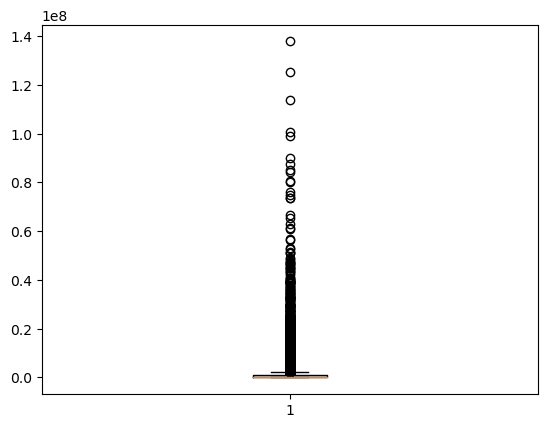

In [9]:
# visual: boxplot
print("Average views of raw data")

print(clear_data["views"])

plt.boxplot(clear_data["views"])
plt.show()


       before std  after std
0        17158579  16.658009
1         1014651  13.830055
2         3191434  14.975981
3         2095828  14.555459
4        33523622  17.327761
...           ...        ...
40876       80685  11.298308
40877      103339   11.54577
40878      773347  13.558483
40879      115225  11.654642
40880      107392  11.584241

[39585 rows x 2 columns]


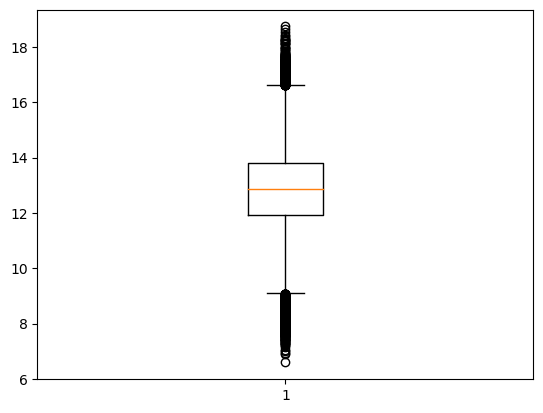

In [10]:
transformed_data = np.log(clear_data["views"])

compare_data = pd.DataFrame({
    'before std': clear_data["views"],
    'after std': transformed_data
})

print (compare_data)

plt.boxplot(transformed_data)
plt.show()

Because there are some outliers after being skewed. So next step is to fix the outliers with IQR Method.

In [11]:
q1 = transformed_data.quantile(0.25)
q3 = transformed_data.quantile(0.75)
iqr = q3-q1

lower_whisker = q1 - (1.5*iqr)
higher_whisker = q3 - (1.5*iqr)

print(q1, " ", q3)
print(lower_whisker, " ", higher_whisker)

11.916488765788797   13.798505792998437
9.093463224974336   10.975480252183978


Outliers will be any points below Lower_Whisker or above Upper_Whisker. So we need to delete those which outside whisker

In [12]:
transformed_data_outliers = transformed_data[transformed_data<higher_whisker] 
transformed_data_outliers = transformed_data_outliers[transformed_data_outliers>lower_whisker] 
print(transformed_data.shape)

print(transformed_data_outliers.shape)

(39585,)
(3171,)


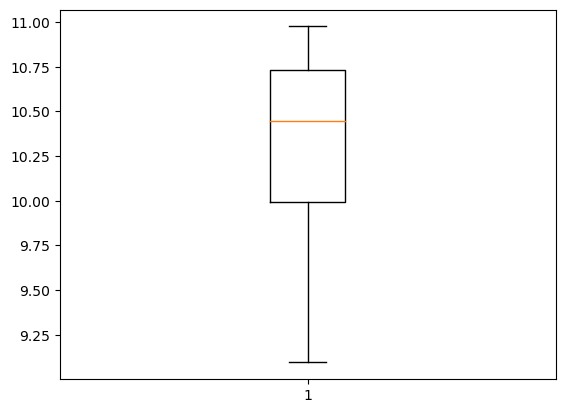

In [13]:
plt.boxplot(transformed_data_outliers)
plt.show()

From the visualization above, we can see that the table "views" has vast range and the difference of its range is relatively high. To make it more understandable in statistically speaking, the mode in table "views" is bigger than the median of this table and the median of this table is bigger than the mean of this table.

In [14]:
# clear dataframe

# Parse the datetime column
clear_data['publish_time'] = pd.to_datetime(clear_data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Extract year and month into new columns
clear_data['year'] = clear_data['publish_time'].dt.year
clear_data['month'] = clear_data['publish_time'].dt.month

# Combine year and month into a new column
clear_data['year_month'] = clear_data['year'].astype(str) + '-' + clear_data['month'].astype(str)

clear_data


/var/folders/nr/y6gpptp56cn959bsyj74jgnc0000gn/T/ipykernel_9153/3609157206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_data['publish_time'] = pd.to_datetime(clear_data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
/var/folders/nr/y6gpptp56cn959bsyj74jgnc0000gn/T/ipykernel_9153/3609157206.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_data['year'] = clear_data['publish_time'].dt.year
/var/folders/nr/y6gpptp56cn959bsyj74jgnc0000gn/T/ipykernel_9153/3609157206.py:8: SettingWithCopyWa

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,year,month,year_month
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2017,11,2017-11
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,2017,11,2017-11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,2017-11
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017,11,2017-11
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017,11,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,2018,6,2018-6
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,2018,6,2018-6
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,2018,6,2018-6
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,2018,6,2018-6


      before_log  after_log
2018       29930  10.306617
2017        9615   9.171080
2016          10   2.302585
2013           9   2.197225
2015           6   1.791759
2014           5   1.609438
2008           5   1.609438
2010           3   1.098612
2009           1   0.000000
2012           1   0.000000


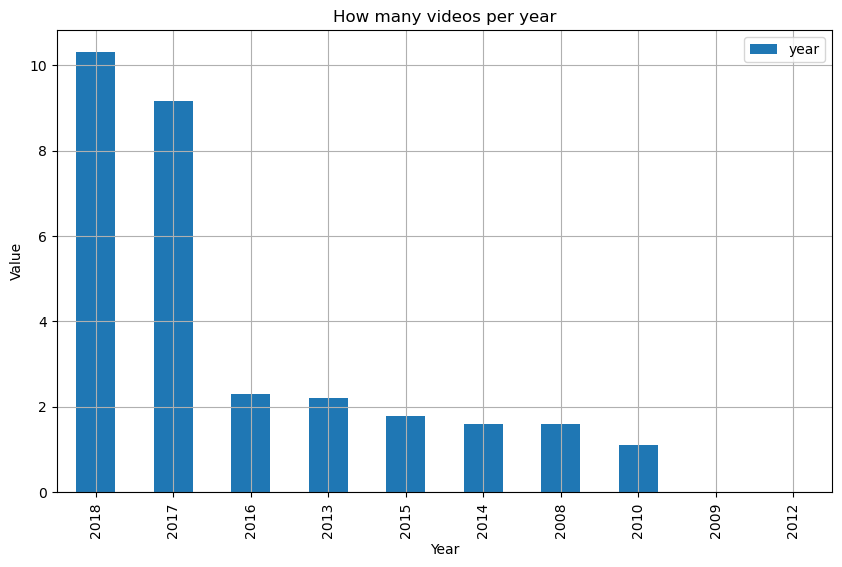

In [15]:
data_year = clear_data['year'].value_counts()
data_year_log = np.log(data_year)

compare_data = pd.DataFrame ({
    "before_log": data_year,
    "after_log": data_year_log
})
print(compare_data)

df = pd.DataFrame(data_year_log, index=[2018, 2017, 2016, 2013, 2015, 2014, 2008, 2010, 2009, 2012])

# Plot the time series data
df.plot(kind='bar', figsize=(10, 6))
plt.title('How many videos per year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()


From the visualization above, we can see that the artists who upload the videos slowly increasing. However from 2016 to 2017 we can see that there is a massive improvement. So since 2017, more people are uploading their YouTube consent

    before_log  after_log
3         6081   8.712924
5         6000   8.699515
12        5971   8.694670
1         5502   8.612867
2         5360   8.586719
4         4639   8.442254
11        3630   8.196988
6         2370   7.770645
9           13   2.564949
10          10   2.302585
8            5   1.609438
7            4   1.386294


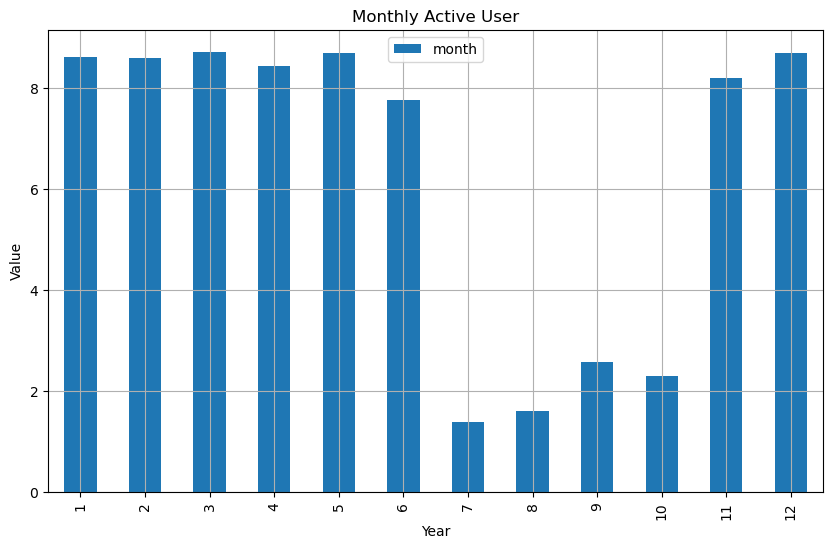

In [16]:
data_month = clear_data['month'].value_counts()
data_month_log = np.log(data_month)

compare_data = pd.DataFrame ({
    "before_log": data_month,
    "after_log": data_month_log
})
print(compare_data)

df = pd.DataFrame(data_month_log, index=[1,2,3,4,5,6,7,8,9,10,11,12])

# Plot the time series data
df.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Active User')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()


While looking on the monthly side, the artists over all posted on months other than July, August, September and October.

In [17]:
tags = []

for i in clear_data["tags"]:
    clear_string = i.replace('"', '').split("|")
    tags.append(clear_string)

# Flatten the list of lists into a single list
flat_list = [item for sublist in tags for item in sublist]

# Concatenate the strings into a single text
text_data = ' '.join(flat_list)


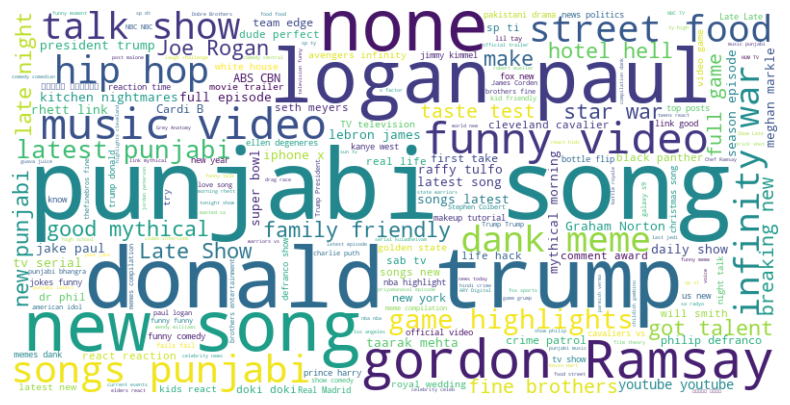

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the word cloud above we can see that "Punjabi", "Song", Donald", "Trump" are the most frequently used tags